In [1]:
import numpy as np
import math
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import scipy
import scipy.io
np.random.seed()

<class 'dict'>


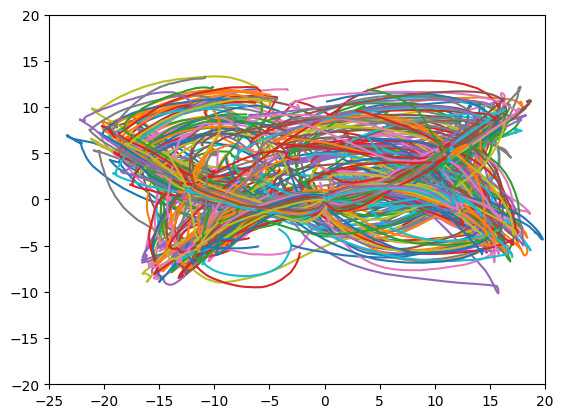

In [2]:
mat = scipy.io.loadmat('dataTrajectories-25.mat')
print(type(mat))
dfx = pd.DataFrame(mat["X"].T)
dfy = pd.DataFrame(mat["Y"].T)
dfx = dfx.reset_index().drop(columns="index")
dfy = dfy.reset_index().drop(columns="index")
dfx1 = dfx.dropna()
dfy1 = dfy.dropna()
for i, row in dfx1.iterrows():
    plt.plot(dfx1.loc[i],dfy1.loc[i])

plt.xlim([-25, 20])
plt.ylim([-20, 20])
plt.show()

In [3]:
import numpy as np
from sklearn.cluster import KMeans
import pandas as pd

# Combine dfx1 and dfy1 into a single feature matrix
features = np.hstack((dfx1.values, dfy1.values))

# Number of clusters
n_clusters = 4

# Set a fixed random seed
random_seed = 12

# Initialize KMeans with random seed
kmeans = KMeans(n_clusters=n_clusters, random_state=random_seed)

# Fit KMeans clustering model
kmeans.fit(features)

# Get cluster labels
cluster_labels = kmeans.labels_

# Create empty lists to hold trajectories for each cluster
cluster_dfx = [[] for _ in range(n_clusters)]
cluster_dfy = [[] for _ in range(n_clusters)]

# Split trajectories into separate lists for each cluster
for i, label in enumerate(cluster_labels):
    cluster_dfx[label].append(dfx1.iloc[i])
    cluster_dfy[label].append(dfy1.iloc[i])

# Concatenate trajectories within each cluster to create datasets
cluster_datasets = []
for i in range(n_clusters):
    cluster_dfx[i] = pd.concat(cluster_dfx[i], axis=1).T.reset_index(drop=True)
    cluster_dfy[i] = pd.concat(cluster_dfy[i], axis=1).T.reset_index(drop=True)
    cluster_datasets.append((cluster_dfx[i], cluster_dfy[i]))

# Print the number of trajectories in each cluster
for i in range(n_clusters):
    print(f"Cluster {i + 1} has {len(cluster_datasets[i][0])} trajectories for x and {len(cluster_datasets[i][1])} trajectories for y.")


/Users/flaviaferrusmarimon/Library/Python/3.9/lib/python/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Cluster 1 has 170 trajectories for x and 170 trajectories for y.
Cluster 2 has 199 trajectories for x and 199 trajectories for y.
Cluster 3 has 178 trajectories for x and 178 trajectories for y.
Cluster 4 has 143 trajectories for x and 143 trajectories for y.


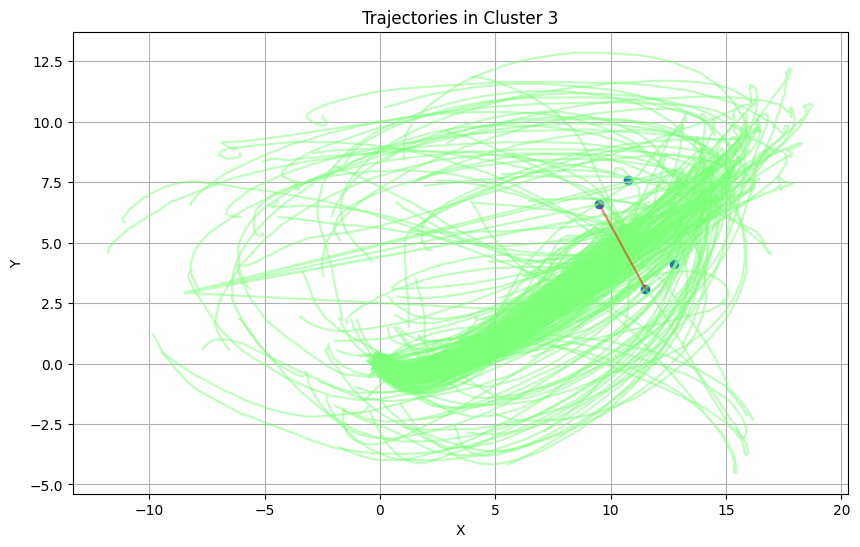

In [4]:
cluster = 2
# Plot trajectories colored by cluster
pt = (10.5, 4.85)
pt0 = (pt[0] - 1, pt[1] + 1.75)
pt1 = (pt[0] + 1, pt[1] - 1.75)
pt2 = (pt0[0] + 1.25, pt0[1] + 1 )
pt3 = (pt1[0] + 1.25, pt1[1] + 1)
rectx,recty=np.array([pt0[0], pt2[0], pt1[0], pt3[0]]), np.array([pt0[1], pt2[1], pt1[1], pt3[1]])

plt.figure(figsize=(10, 6))
for i in range(len(dfx1)):
    if (cluster_labels[i] == cluster):
        plt.plot(dfx1.loc[i], dfy1.loc[i], color=plt.cm.jet(cluster_labels[i] / n_clusters), alpha=0.5)
#plt.plot(dfx1.mean(axis=0), dfy1.mean(axis=0), color = 'purple', alpha = 1)
plt.scatter(rectx,recty)
plt.plot([rectx[0], rectx[2]], [recty[0], recty[2]], color = 'red', alpha = 0.5)
plt.title('Trajectories in Cluster 3')
plt.grid(True)
plt.xlabel('X')
plt.ylabel('Y')
plt.show()

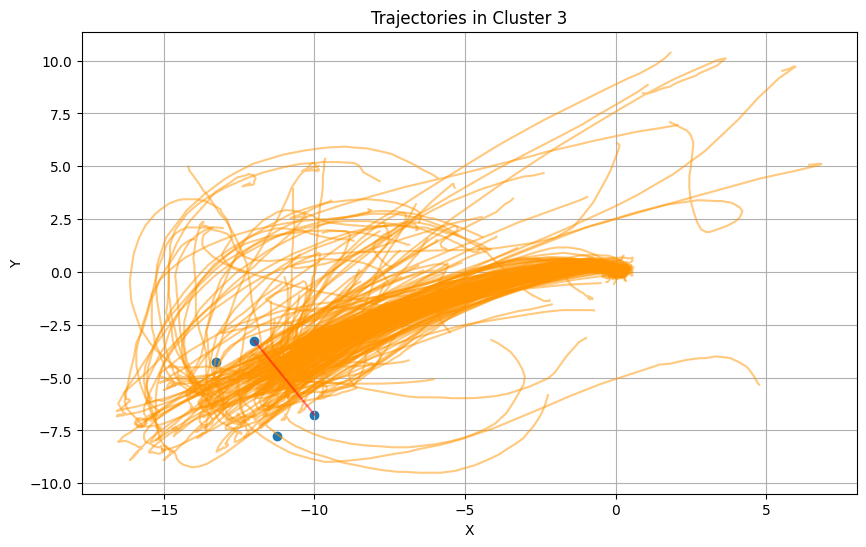

In [18]:
cluster = 3
# Plot trajectories colored by cluster
pt = (-11, -5)
pt0 = (pt[0] - 1, pt[1] + 1.75)
pt1 = (pt[0] + 1, pt[1] - 1.75)
pt2 = (pt0[0] - 1.25, pt0[1] - 1 )
pt3 = (pt1[0] - 1.25, pt1[1] - 1)
rectx,recty=np.array([pt0[0], pt2[0], pt1[0], pt3[0]]), np.array([pt0[1], pt2[1], pt1[1], pt3[1]])

plt.figure(figsize=(10, 6))
for i in range(len(dfx1)):
    if (cluster_labels[i] == cluster):
        plt.plot(dfx1.loc[i], dfy1.loc[i], color=plt.cm.jet(cluster_labels[i] / n_clusters), alpha=0.5)
#plt.plot(dfx1.mean(axis=0), dfy1.mean(axis=0), color = 'purple', alpha = 1)
plt.scatter(rectx,recty)
plt.plot([rectx[0], rectx[2]], [recty[0], recty[2]], color = 'red', alpha = 0.5)
plt.title('Trajectories in Cluster {}'.format(cluster))
plt.grid(True)
plt.xlabel('X')
plt.ylabel('Y')
plt.show()

In [105]:
# Function to check if a point p is on a line segment defined by the points r, s
## Here r = (15.5, 6)=(r_1, r_2), s = (13, 9) = (s_1, s_2)
def on_segment(p, r, s, tol = 1e-3):
    x_max = max(r[0], s[0])
    x_min = min(r[0], s[0])
    y_max = max(r[1], s[1])
    y_min = min(r[1], s[1])
    if (p[0] <= x_max and p[0] >= x_min and 
        p[1] <= y_max and p[1] >= y_min and 
        (p[0] - r[0]) / (p[1] - r[1] ) - (s[0] - r[0]) / (s[1] - r[1]) < tol ):
            return True
    return False


In [107]:
## Truncated dataframes: 
dfx_2 = cluster_dfx[2]
dfy_2 = cluster_dfy[2]
print('Dataset shape before cleaning:')
print(dfx_2.shape)

## Points defining the target segment
r = (pt0[0], pt0[1])
s = (pt1[0], pt1[1])
idxrule = []

for dx in dfx_2.index:
    t_intersect = None  # Initialize t_intersect
    for t in range(len(dfx_2.columns) - 1):
        p = (dfx_2.loc[dx, dfx_2.columns[t]], dfy_2.loc[dx, dfx_2.columns[t]])
        if on_segment(p, r, s):
            #print('Intersection at point: ', p[0], p[1])
            # If intersects, keep trajectory up to the intersecting point
            t_intersect = t + 1
            idxrule.append(t_intersect)
            dfx_2.loc[dx, dfx_2.columns[t_intersect:]] = p[0]
            dfy_2.loc[dx, dfx_2.columns[t_intersect:]] = p[1]
            # And we stop looking for the intersection
            break

    if t_intersect is None:
        # No intersection found, drop the row
        print('Dropping row: ', dx)
        dfx_2 = dfx_2.drop(axis=0, index=dx)
        dfy_2 = dfy_2.drop(axis=0, index=dx)

print('Dataset shape after cleaning:')
print(dfx_2.shape)

Dataset shape before cleaning:
(178, 2500)
Dropping row:  0
Dropping row:  5
Dropping row:  6
Dropping row:  10
Dropping row:  39
Dropping row:  44
Dropping row:  66
Dropping row:  110
Dropping row:  123
Dropping row:  136
Dropping row:  137
Dataset shape after cleaning:
(167, 2500)


(165, 2500)


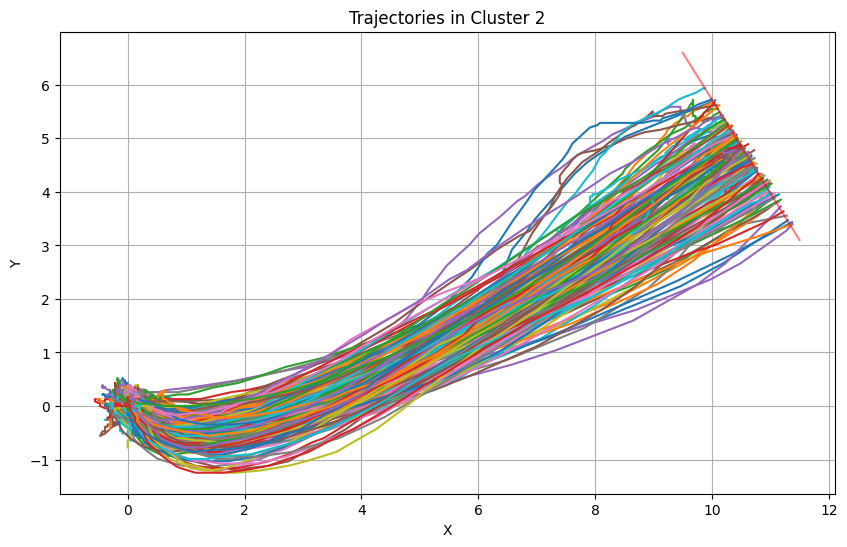

In [108]:
index1 = dfy_2[(dfy_2 < -2).any(axis=1)].index
index2 = dfx_2[(dfx_2 < -5).any(axis=1)].index
index = index1.union(index2)
dfx_2 = dfx_2.drop(axis=0, index=index)
dfy_2 = dfy_2.drop(axis=0, index=index)
print(dfx_2.shape)
plt.figure(figsize=(10, 6))
for i in range(len(dfx_2)):
    plt.plot(dfx_2.iloc[i], dfy_2.iloc[i])
plt.plot([r[0], s[0]], [r[1], s[1]], color='red', alpha=0.5)
plt.title('Trajectories in Cluster 2')
plt.grid(True)
plt.xlabel('X')
plt.ylabel('Y')
plt.show()

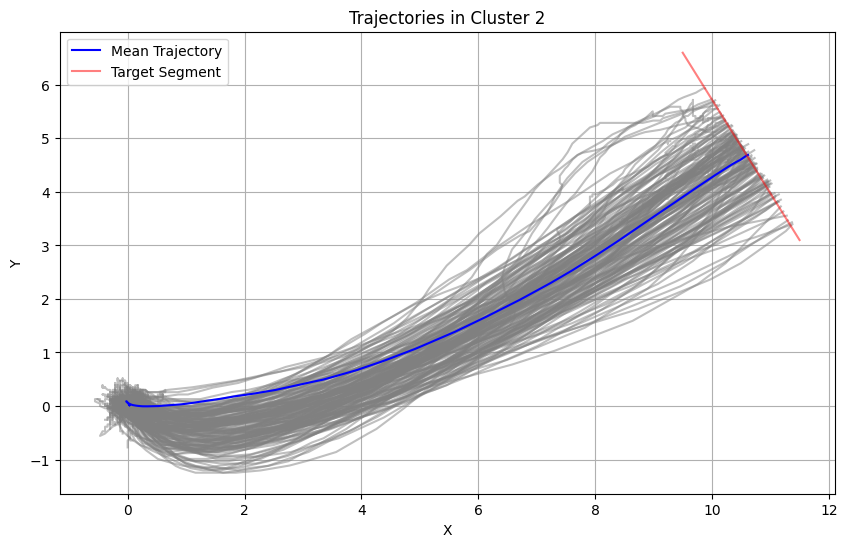

In [109]:
# Compute the mean trajectory
mean_x = dfx_2.mean(axis=0)
mean_y = dfy_2.mean(axis=0)

# Plot the mean trajectory
plt.figure(figsize=(10, 6))
for i in range(len(dfx_2)):
    plt.plot(dfx_2.iloc[i], dfy_2.iloc[i], color='gray', alpha=0.5)
plt.plot(mean_x, mean_y, color='blue', label='Mean Trajectory', alpha = 1)

plt.plot([r[0], s[0]], [r[1], s[1]], color='red', alpha=0.5, label='Target Segment')
plt.title('Trajectories in Cluster 2')
plt.grid(True)
plt.xlabel('X')
plt.ylabel('Y')
plt.legend()
plt.show()

In [110]:
# Computing velocity of each point along the trajectories
dfx1=dfx_2.iloc[:,1:]
dfx1.columns = range(dfx1.shape[1])
dfvx=dfx1-dfx_2.iloc[:,:-1]

dfy1=dfy_2.iloc[:,1:]
dfy1.columns = range(dfy1.shape[1])
dfvy=dfy1-dfy_2.iloc[:,:-1]

dfv=np.sqrt(np.square(dfvx)+np.square(dfvy))
#print(dfv)

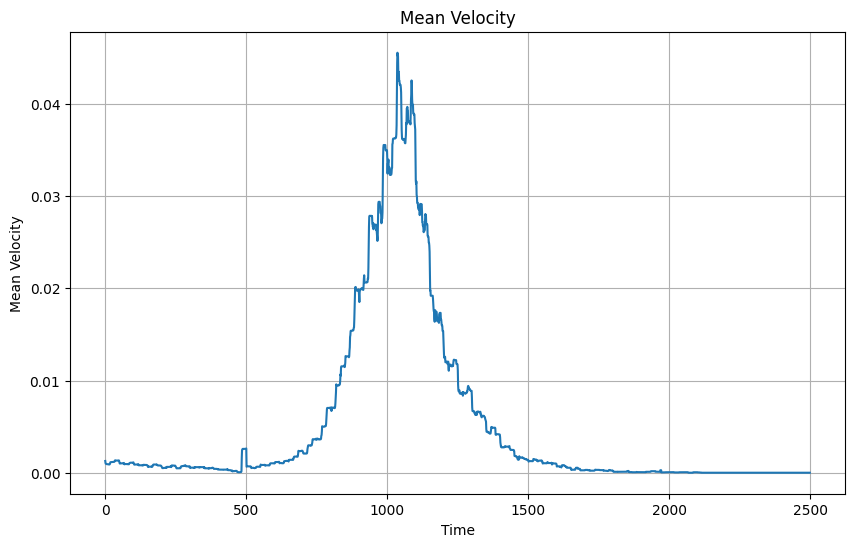

In [111]:
# Calculate mean velocity at each time step
mean_velocity = dfv.mean(axis=0)

# Plot mean velocity
plt.figure(figsize=(10, 6))
plt.plot(mean_velocity, label='Mean Velocity')
plt.title('Mean Velocity')
plt.xlabel('Time')
plt.ylabel('Mean Velocity')
#plt.legend()
plt.grid(True)
plt.show()

In [112]:
# Compute the mean of the list idxrule: this is the stopping time average 
mean_idxrule = sum(idxrule) / len(idxrule)
print(mean_idxrule)

1305.6586826347304


In [113]:
print(dfv.shape)
print((dfv.T).shape)
print(dfvx.T.max().mean())
print(dfvy.T.max().mean())

(165, 2499)
(2499, 165)
0.06738942477457516
0.04315738983239156


In [114]:
# Divide by 1000 as per your computation ? Need units
T = mean_idxrule / 1000
vel=dfv.T.max().mean()
T,vel

(1.3056586826347305, 0.0780143251273054)

## Linear transformation

In [115]:
model_target = np.array((1,0))
screen_target = np.array(((rectx[3]+rectx[0])/2,(recty[3]+recty[0])/2))
model_origin = np.array((np.cos(-math.pi*7/24),np.sin(-math.pi*7/24)))
screen_origin = np.array((0,0))

d_model=np.linalg.norm(model_target-model_origin)
d_screen=np.linalg.norm(screen_target-screen_origin)

v_model=model_target-model_origin
v_model_ort=np.array((v_model[1],-v_model[0]))

v_screen=screen_target-screen_origin
v_screen_ort=np.array((v_screen[1],-v_screen[0]))

model_M=np.vstack((np.append(model_origin,1),np.append(model_target,1),np.append(v_model_ort,0))).T
screen_M=np.vstack((np.append(screen_origin,1),np.append(screen_target,1),np.append(v_screen_ort,0))).T

M=np.dot(model_M,np.linalg.inv(screen_M))
A=M[:2,:2]
b=M[:2,-1:].flatten()

In [116]:
dfx_3=A[0,0]*dfx_2+A[0,1]*dfy_2+b[0]
dfy_3=A[1,0]*dfx_2+A[1,1]*dfy_2+b[1]

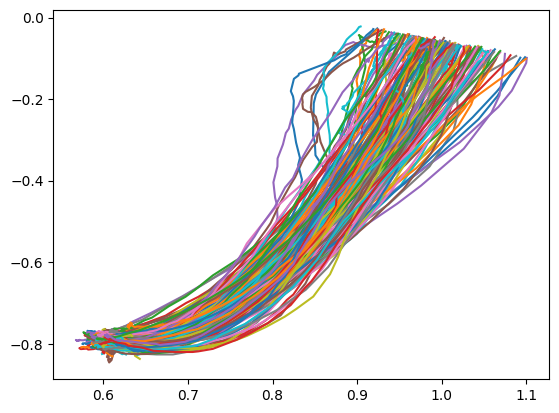

In [117]:
for i in range(len(dfx_3)):
    plt.plot(dfx_3.iloc[i],dfy_3.iloc[i])
plt.show()

# Simulation 

In [121]:
def modelSimulation(in_con=(0,0,0,0), x_T=1., x_1=.2, sigma=.5, alpha=.5, beta=.5, epsilon=.5, gamma=.5,
                    timestep=1./500, angle=math.pi*7/24, angle0=0, p=(.2,0), r=.1,
                    initial_control=[ 3.04624830e+00, -1.56797070e-01,  5.48092996e-01,  6.52857202e-01, -6.97473103e+00,  6.86269834e-03],
                    Arc=True, Brownian=True):
    
    x,v,y,w = in_con
    
    x_Story=[]
    v_Story=[]
    y_Story=[]
    w_Story=[]
    
    ux_Story=[]
    uy_Story=[]
    
    l=x_T-x
    i=0
    t=0.
    Wt=0.
    lambda2, lambda4, lambda1, lambda3,l1,l3=initial_control
#     ux, uy, lambda1, lambda3,l1,l3=initial_control
    
    while(i<2 or (x<x_T and i<1000)):
            
        t=i*timestep
        
        if(x>x_1):
            lambda1, lambda3=l1,l3
        
        if(Brownian == True):
            W_increment=np.random.normal(0.,np.sqrt(timestep),1)[0]
        else:
            W_increment=1.
            
        Wt=Wt+W_increment
        
        #lambda1=lambda1+timestep*0
        if(i>2 and np.linalg.norm(x-x_T)<timestep*v):
            lambda3=lambda3+timestep*(-2*y)
        
        lambda2=lambda2+timestep*lambda1
        ux=epsilon*l/(1-gamma)*lambda2*math.e**(t/beta)
        lambda4=lambda4+timestep*lambda3
        uy=epsilon*l/(gamma)*lambda3*math.e**(t/beta)
#         ux=ux+timestep*l/(1-gamma)*lambda1
#         uy=uy+timestep*l/(gamma)*lambda3
        
        v=v+timestep*ux
        w=w+timestep*uy
        
        x=x+timestep*v
        y=y+timestep*(w+alpha*ux**2*sigma*W_increment)
        
        # ## System's dynamics:
        # u1 = - (l * l3) / ( 2 * Wt * l * l2 * sigma * np.exp(t/gamma) - alpha * epsilon + epsilon ) * np.exp(t/gamma)
        # u2 = - (l * l4) / (alpha * epsilon) * np.exp(t/gamma)
         
        # p1 = p1 + dt * v1
        # p2 = p2 + dt * (v2 + Wt * sigma * u1**2)
        # v1 = v1 + dt * u1
        # v2 = v2 + dt * u2 
        
        # l1 = l1
        # if (np.linalg.norm(p1 - p_T) < dt * v1):
        #     l2 = l2 - dt * (2 * p2 * np.exp(- t / gamma)) 
        # l3 = l3 - dt * l1
        # l4 = l4 - dt * l2 
        
        #We record the story
        if(Arc):
            x_Story.append((1+y)*np.cos(angle*(x/x_T-1)+angle0))
            y_Story.append((1+y)*np.sin(angle*(x/x_T-1)+angle0))
        else:
            x_Story.append(x)
            y_Story.append(y)
        v_Story.append(v)
        w_Story.append(w)
        ux_Story.append(ux)
        uy_Story.append(uy)
        
        i=i+1
    if(i==1000):
        t=1000
    return np.array(x_Story), np.array(v_Story), np.array(ux_Story),\
            np.array(y_Story), np.array(w_Story), np.array(uy_Story), t

In [122]:
def fun3 (parameters):
    beta, epsilon, gamma= parameters
    
    x2,v2,ux2,y2,w2,uy2,T2=modelSimulation(sigma=0, beta=beta, epsilon=epsilon, gamma=gamma)
    vel2=np.max(np.sqrt(np.square(v2)+np.square(w2)))
    return (T2-T)**2+(vel2-vel)**2

res2=scipy.optimize.minimize(fun3, (.5, .5, .5), args=(), method=None)
res2.x, fun3(res2.x), (T,vel)

(array([0.5651358 , 0.40422095, 0.4059207 ]),
 7.507485861362136,
 (1.998, 0.0780143251273054))

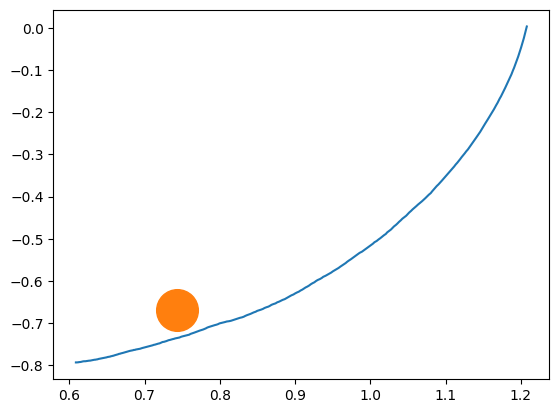

In [124]:
import random

beta, epsilon, gamma = res2.x
random.seed(10)
x,v,ux,y,w,uy,T=modelSimulation(beta=beta, epsilon=epsilon, gamma=gamma)
plt.plot(x,y)
angle=math.pi*7/24
T_1=.2
plt.plot(np.cos(angle*(T_1-1)),np.sin(angle*(T_1-1)),marker='o',markersize=30)
plt.show()

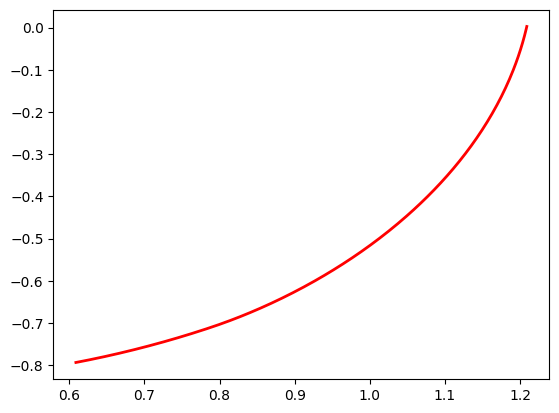

In [52]:
%matplotlib inline

beta, epsilon, gamma = res2.x
x,v,ux,y,w,uy,T=modelSimulation(sigma=0, beta=beta, epsilon=epsilon, gamma=gamma)
# x2=xmean
# y2=ymean
plt.plot(x,y,'r',linewidth=2)

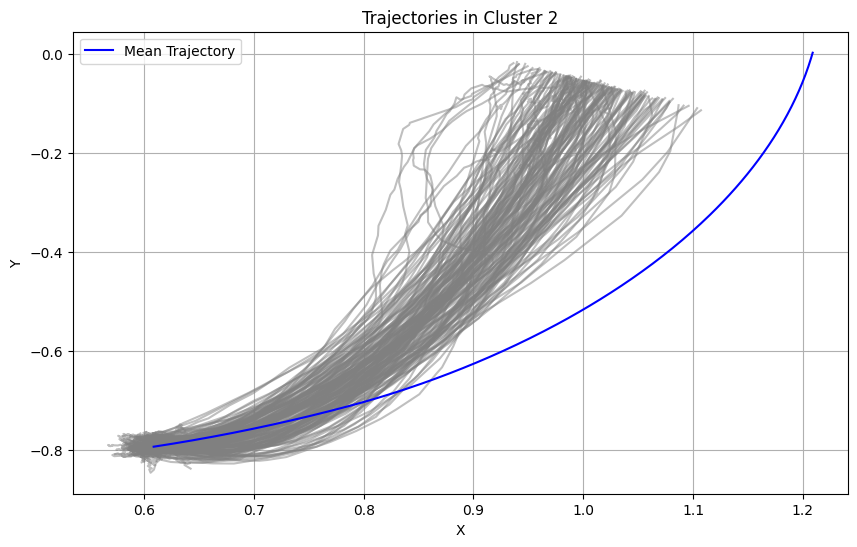

In [58]:
plt.figure(figsize=(10, 6))
for i in range(len(dfx_3)):
    plt.plot(dfx_3.iloc[i], dfy_3.iloc[i], color='gray', alpha=0.5)
plt.plot(x, y, color='blue', label='Mean Trajectory', alpha = 1)

#plt.plot([r[0], s[0]], [r[1], s[1]], color='red', alpha=0.5, label='Target Segment')
plt.title('Trajectories in Cluster 2')
plt.grid(True)
plt.xlabel('X')
plt.ylabel('Y')
plt.legend()
plt.show()

# Simulation 2

In [118]:
def numericalSimulation(x_0 = (0,0,0,0),  p_T = 1.0, 
                        sigma = 0.5, gamma = 0.5, epsilon = 0.5, alpha = 0.5,
                        u_0 = (0,0), l_0 = (0,0,0,0), 
                        i_max = 1000, dt = 1./500,
                        Autoregr = True, 
                        Arc = True, angle=math.pi*7/24, angle0=0, p=(.2,0), r=.1): 
    
    ## Set the initial conditions: 
    p1, p2, v1, v2 = x_0
    u1, u2 = u_0
    l1, l2, l3, l4 = l_0
    
    ## Initialize the loop
    i = 0
    t = 0.
    Wt = 0
    l = p_T - p1
    
    ## Initialize the trajectory vector
    p1_ = []
    p2_ = []
    v1_ = []
    v2_ = []
    
    ## Initialize the utility vector 
    u1_ = []
    u2_ = []
     
    ## Model time evolution definition following the system's dynamics
    while (i < i_max and p1 < p_T):
        
        t = i * dt
        if ( Autoregr == True ):
            W_increment=np.random.normal(0.,np.sqrt(dt),1)[0]
            Wt = Wt + W_increment
        else: 
            Wt = np.random.normal(0.,np.sqrt(dt),1)[0] 
           
        ## System's dynamics:
        u1 = - (l * l3) / ( 2 * Wt * l * l2 * sigma * np.exp(t/gamma) - alpha * epsilon + epsilon ) * np.exp(t/gamma)
        u2 = - (l * l4) / (alpha * epsilon) * np.exp(t/gamma)
         
        p1 = p1 + dt * v1
        p2 = p2 + dt * (v2 + Wt * sigma * u1**2)
        v1 = v1 + dt * u1
        v2 = v2 + dt * u2 
        
        l1 = l1
        if (np.linalg.norm(p1 - p_T) < dt * v1):
            l2 = l2 - dt * (2 * p2 * np.exp(- t / gamma)) 
        l3 = l3 - dt * l1
        l4 = l4 - dt * l2 
        
        if(Arc):
            p1_.append((1+p2)*np.cos(angle*(p1/p_T-1)+angle0))
            p2_.append((1+p2)*np.sin(angle*(p1/p_T-1)+angle0))
        else:
            p1_.append(p1)
            p2_.append(p2)
        v1_.append(v1)
        v2_.append(v2)
        u1_.append(u1)
        u2_.append(u2)
        
        i = i + 1
        
    return np.array(p1_), np.array(p2_), np.array(v1_), np.array(v2_), np.array(u1_), np.array(u2_), t

In [125]:
alpha=.5
epsilon=.1
gamma=.5
timestep=1/500
random.seed(10)
def arc_length(x, y):
    '''
        Function that calculates the arc length of a curve defined by points (x, y).
    '''
    npts = len(x)
    arc = np.sqrt((x[1] - x[0])**2 + (y[1] - y[0])**2)
    for k in range(1, npts):
        arc = arc + np.sqrt((x[k] - x[k-1])**2 + (y[k] - y[k-1])**2)

    return arc

def ComputeFunctional(parameters):
    
    x, y, v, w, ux, uy, T= numericalSimulation(x_0 = (0,0,0,0),  p_T = 1.0, 
                        sigma = 0, gamma = gamma, epsilon = epsilon, alpha = alpha,
                        u_0 = parameters[:2], l_0 = parameters[2:], 
                        i_max = 1000, dt = timestep,
                        Autoregr = False, 
                        Arc = True, angle=math.pi*7/24, angle0=0, p=(.2,0), r=.1)
    
    trange=np.linspace(0, len(ux)*timestep, num=len(ux))
    force=((1-alpha)*ux**2+alpha*uy**2)*math.e**(trange/gamma)/(2*arc_length(x,y))
    integral=(force[1:]+force[:-1]).sum()*T/(2*(len(ux)-1))
    
    ### J per què està definida així???
    #print(x)
    J=(1-y[-1]**2)*math.e**(-T/gamma)-epsilon*integral
    return -J

initial_cond=scipy.optimize.minimize(ComputeFunctional, ( 3.7, -0.15679707,  0.97252444,  0.54660283, -6.75775885, -0.06253371), args=(), method=None)
initial_cond.x, ComputeFunctional(initial_cond.x)

(array([ 3.7       , -0.15679707, -0.45744691,  0.40540147, -0.29883889,
         0.08127571]),
 1.1613777131154015)

1.1613777131154015


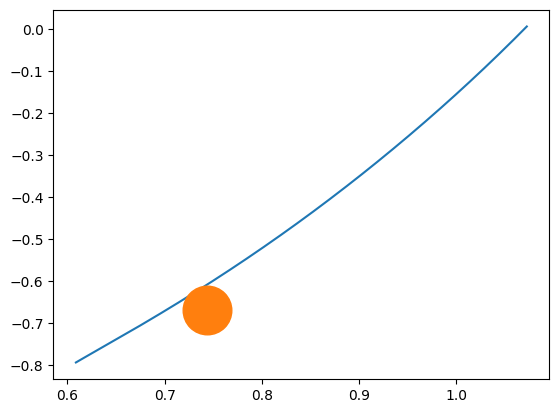

In [127]:
random.seed(123)
parameters = initial_cond.x
sigma = 0
print(ComputeFunctional(parameters))
x, y, v, w, ux, uy, T= numericalSimulation(x_0 = (0,0,0,0),  p_T = 1.0, 
                        sigma = sigma, gamma = gamma, epsilon = epsilon, alpha = alpha,
                        u_0 = parameters[:2], l_0 = parameters[2:], 
                        i_max = 1000, dt = timestep,
                        Autoregr = True, 
                        Arc = True, angle=math.pi*7/24, angle0=0, p=(.2,0), r=.1
                        )

plt.plot(x,y)
angle=math.pi*7/24
T_1=.2
plt.plot(np.cos(angle*(T_1-1)),np.sin(angle*(T_1-1)),marker='o',markersize=35)
plt.show()

1.1613777131154015


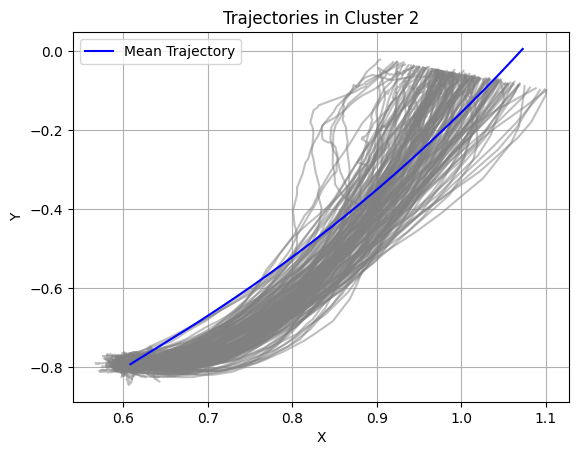

In [128]:
random.seed(10)
parameters = initial_cond.x
sigma = 0
print(ComputeFunctional(parameters))
x, y, v, w, ux, uy, T= numericalSimulation(x_0 = (0,0,0,0),  p_T = 1.0, 
                        sigma = sigma, gamma = gamma, epsilon = epsilon, alpha = alpha,
                        u_0 = parameters[:2], l_0 = parameters[2:], 
                        i_max = 1000, dt = timestep,
                        Autoregr = True, 
                        Arc = True, angle=math.pi*7/24, angle0=0, p=(.2,0), r=.1
                        )
for i in range(len(dfx_3)):
    plt.plot(dfx_3.iloc[i], dfy_3.iloc[i], color='gray', alpha=0.5)
plt.plot(x, y, color='blue', label='Mean Trajectory', alpha = 1)
plt.title('Trajectories in Cluster 2')
plt.grid(True)
plt.xlabel('X')
plt.ylabel('Y')
plt.legend()
plt.show()

1.1613777131154015


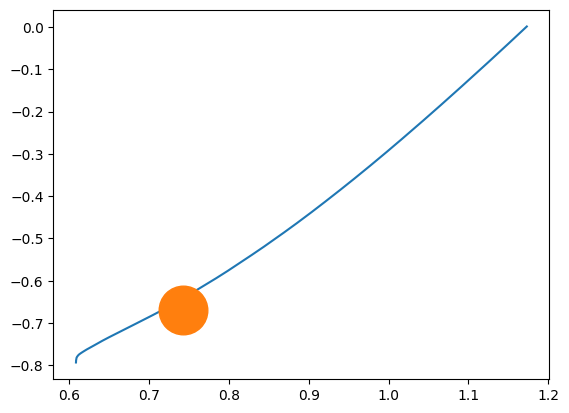

In [129]:
random.seed(10)
parameters = initial_cond.x
sigma = 0.01
print(ComputeFunctional(parameters))
x, y, v, w, ux, uy, T= numericalSimulation(x_0 = (0,0,0,0),  p_T = 1.0, 
                        sigma = sigma, gamma = gamma, epsilon = epsilon, alpha = alpha,
                        u_0 = parameters[:2], l_0 = parameters[2:], 
                        i_max = 1000, dt = timestep,
                        Autoregr = True, 
                        Arc = True, angle=math.pi*7/24, angle0=0, p=(.2,0), r=.1
                        )

plt.plot(x,y)
angle=math.pi*7/24
T_1=.2
plt.plot(np.cos(angle*(T_1-1)),np.sin(angle*(T_1-1)),marker='o',markersize=35)
plt.show()

1.1613777131154015


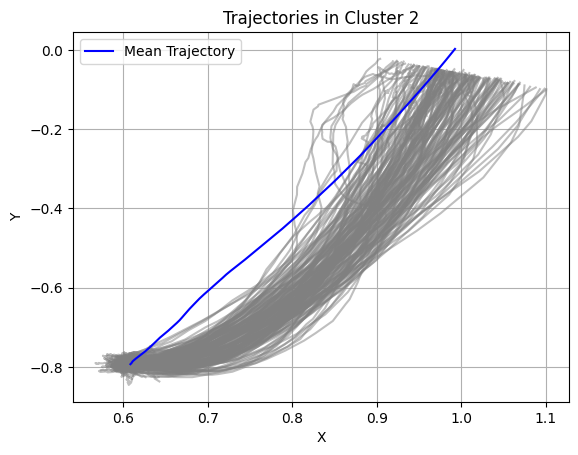

In [130]:
random.seed(10)
parameters = initial_cond.x
sigma = 0.01
print(ComputeFunctional(parameters))
x, y, v, w, ux, uy, T= numericalSimulation(x_0 = (0,0,0,0),  p_T = 1.0, 
                        sigma = sigma, gamma = gamma, epsilon = epsilon, alpha = alpha,
                        u_0 = parameters[:2], l_0 = parameters[2:], 
                        i_max = 1000, dt = timestep,
                        Autoregr = True, 
                        Arc = True, angle=math.pi*7/24, angle0=0, p=(.2,0), r=.1
                        )
for i in range(len(dfx_3)):
    plt.plot(dfx_3.iloc[i], dfy_3.iloc[i], color='gray', alpha=0.5)
plt.plot(x, y, color='blue', label='Mean Trajectory', alpha = 1)
plt.title('Trajectories in Cluster 2')
plt.grid(True)
plt.xlabel('X')
plt.ylabel('Y')
plt.legend()
plt.show()

1.1613777131154015


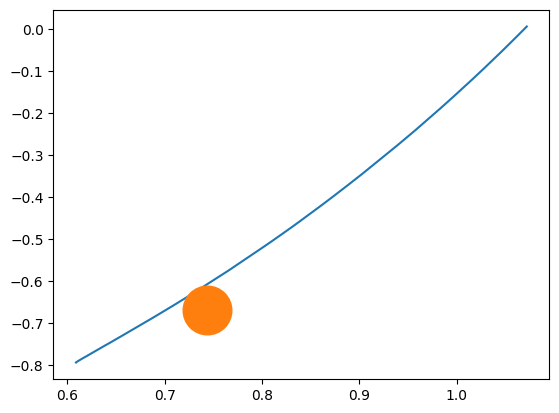

In [131]:
random.seed(10)
parameters = initial_cond.x
sigma = 0.01
print(ComputeFunctional(parameters))
x, y, v, w, ux, uy, T= numericalSimulation(x_0 = (0,0,0,0),  p_T = 1.0, 
                        sigma = sigma, gamma = gamma, epsilon = epsilon, alpha = alpha,
                        u_0 = parameters[:2], l_0 = parameters[2:], 
                        i_max = 1000, dt = timestep,
                        Autoregr = False, 
                        Arc = True, angle=math.pi*7/24, angle0=0, p=(.2,0), r=.1
                        )

plt.plot(x,y)
angle=math.pi*7/24
T_1=.2
plt.plot(np.cos(angle*(T_1-1)),np.sin(angle*(T_1-1)),marker='o',markersize=35)
plt.show()

1.1613777131154015


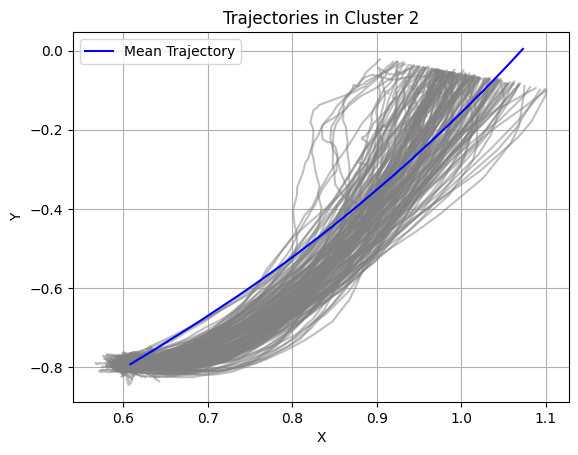

In [133]:
random.seed(10)
parameters = initial_cond.x
sigma = 0.01
print(ComputeFunctional(parameters))
x, y, v, w, ux, uy, T= numericalSimulation(x_0 = (0,0,0,0),  p_T = 1.0, 
                        sigma = sigma, gamma = gamma, epsilon = epsilon, alpha = alpha,
                        u_0 = parameters[:2], l_0 = parameters[2:], 
                        i_max = 1000, dt = timestep,
                        Autoregr = False, 
                        Arc = True, angle=math.pi*7/24, angle0=0, p=(.2,0), r=.1
                        )
for i in range(len(dfx_3)):
    plt.plot(dfx_3.iloc[i], dfy_3.iloc[i], color='gray', alpha=0.5)
plt.plot(x, y, color='blue', label='Mean Trajectory', alpha = 1)
plt.title('Trajectories in Cluster 2')
plt.grid(True)
plt.xlabel('X')
plt.ylabel('Y')
plt.legend()
plt.show()

In [134]:
random.seed(10)
def ComputeVel(parameters):
    gamma, epsilon, alpha = parameters
    parameters2 = ( 3.7, -0.15679707,  0.97252444,  0.54660283, -6.75775885, -0.06253371)
    x, y, v, w, ux, uy, T2= numericalSimulation(x_0 = (0,0,0,0),  p_T = 1.0, 
                        sigma = 0, gamma = gamma, epsilon = epsilon, alpha = alpha,
                        u_0 = parameters2[:2], l_0 = parameters2[2:], 
                        i_max = 1000, dt = timestep,
                        Autoregr = False, 
                        Arc = True, angle=math.pi*7/24, angle0=0, p=(.2,0), r=.1)
    
    vel_max = np.max(np.sqrt(np.square(v) + np.square(w)))
    
    return (T2 - T)**2 + (vel_max - vel)**2
res3=scipy.optimize.minimize(ComputeVel, (.5, .5, .5), args=(), method=None)
res3.x, ComputeVel(res3.x), (T,vel)

(array([ 3.09575756,  3.0187353 , -2.81384974]),
 2.853021956506624,
 (0.584, 0.0780143251273054))

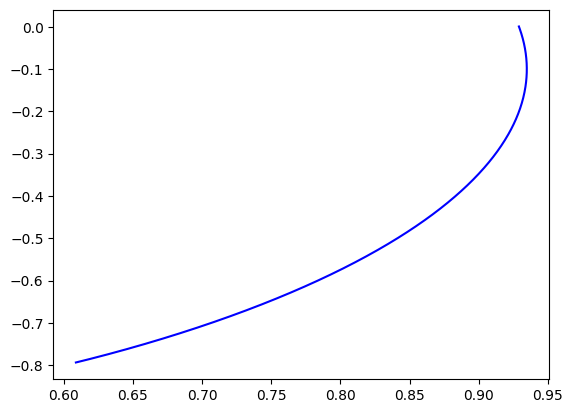

In [135]:
random.seed(10)
gamma, epsilon, alpha = res3.x
parameters2 = ( 3.7, -0.15679707,  0.97252444,  0.54660283, -6.75775885, -0.06253371)
x, y, v, w, ux, uy, T2= numericalSimulation(x_0 = (0,0,0,0),  p_T = 1.0, 
                    sigma = 0, gamma = gamma, epsilon = epsilon, alpha = alpha,
                    u_0 = parameters2[:2], l_0 = parameters2[2:], 
                    i_max = 1000, dt = timestep,
                    Autoregr = False, 
                    Arc = True, angle=math.pi*7/24, angle0=0, p=(.2,0), r=.1)
plt.plot(x, y, color='blue', label='Mean Trajectory', alpha = 1)

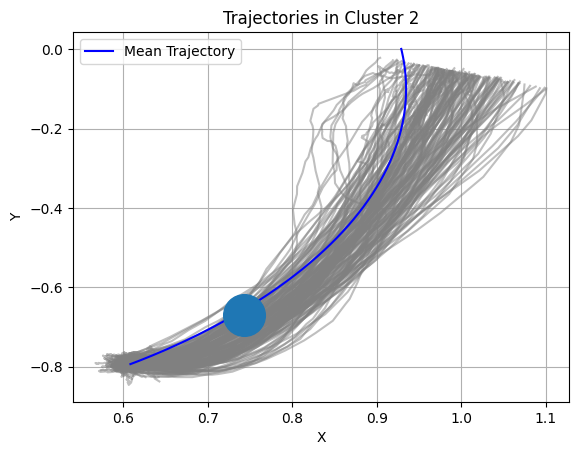

In [136]:
random.seed(10)
for i in range(len(dfx_3)):
    plt.plot(dfx_3.iloc[i], dfy_3.iloc[i], color='gray', alpha=0.5)
plt.plot(x, y, color='blue', label='Mean Trajectory', alpha = 1)
angle=math.pi*7/24
T_1=.2
plt.plot(np.cos(angle*(T_1-1)),np.sin(angle*(T_1-1)),marker='o',markersize=30)

plt.title('Trajectories in Cluster 2')
plt.grid(True)
plt.xlabel('X')
plt.ylabel('Y')
plt.legend()

plt.show()

# Parameter estimation

In [79]:
from scipy.stats import ks_2samp 

In [138]:
xT_samples=[]
dfx_3.reset_index(drop=True, inplace=True)

for i, row in dfx_3.iterrows():
    if (idxrule[i]>0):
        xT_samples.append(dfx_3.loc[i][idxrule[i]-1])

In [139]:
gamma, epsilon, alpha = res3.x
T_samples=idxrule
vel_samples=dfv.T.max()

# Kolmogorov Smirnov Test

def computeSamples(parameters, n = 50):
    sigma = parameters
    parameters2 = ( 3.7, -0.15679707,  0.97252444,  0.54660283, -6.75775885, -0.06253371)
        
    xT2_samples=[]

    for i in range(n):
        x, y, v, w, ux, uy, T2= numericalSimulation(x_0 = (0,0,0,0),  p_T = 1.0, 
                            sigma = sigma, gamma = gamma, epsilon = epsilon, alpha = alpha,
                            u_0 = parameters2[:2], l_0 = parameters2[2:], 
                            i_max = 1000, dt = timestep,
                            Autoregr = True, 
                            Arc = True, angle=math.pi*7/24, angle0=0, p=(.2,0), r=.1)
        xT2_samples.append(x.flatten()[-1])
            
    return ks_2samp(xT_samples, xT2_samples)[0]




In [142]:
samples = computeSamples(0.01, n = 50)
samples

0.6593939393939394

In [143]:
res4=scipy.optimize.minimize_scalar(computeSamples, bracket=None, bounds=None, args=(), method='golden', tol=None, options=None)
res4.x, computeSamples(res4.x)

(1.52741094368726, 0.58)

3.0957575605910734 3.0187352955290563 -2.813849737618697 1.52741094368726


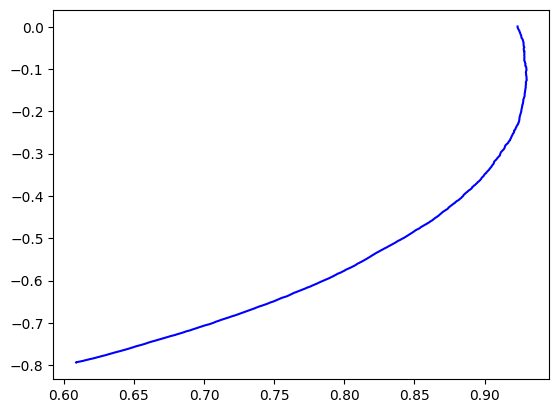

In [147]:
gamma, epsilon, alpha = res3.x
sigma = res4.x
print(gamma, epsilon, alpha, sigma)

x, y, v, w, ux, uy, T2= numericalSimulation(x_0 = (0,0,0,0),  p_T = 1.0, 
                        sigma = sigma, gamma = gamma, epsilon = epsilon, alpha = alpha,
                        u_0 = parameters2[:2], l_0 = parameters2[2:], 
                        i_max = 1000, dt = timestep,
                        Autoregr = False, 
                        Arc = True, angle=math.pi*7/24, angle0=0, p=(.2,0), r=.1)

plt.plot(x, y, color='blue', label='Mean Trajectory', alpha = 1)

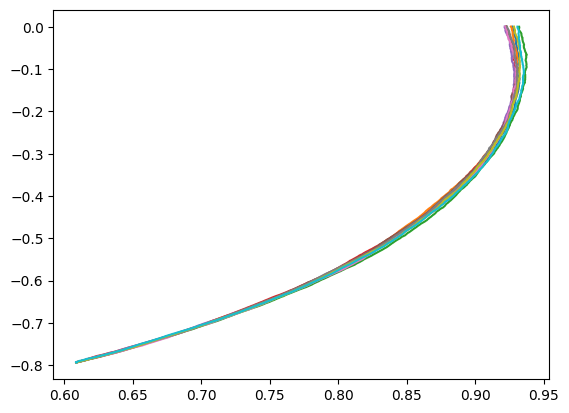

In [148]:
gamma, epsilon, alpha = res3.x
sigma = res4.x

T_samples=idxrule
vel_samples=dfv.T.max()
xT2_samples=[]
n = 10 
fig, ax = plt.subplots( nrows=1, ncols=1 )  # create figure & 1 axis

for i in range(n):
    x, y, v, w, ux, uy, T2= numericalSimulation(x_0 = (0,0,0,0),  p_T = 1.0, 
                        sigma = sigma, gamma = gamma, epsilon = epsilon, alpha = alpha,
                        u_0 = parameters2[:2], l_0 = parameters2[2:], 
                        i_max = 1000, dt = timestep,
                        Autoregr = False, 
                        Arc = True, angle=math.pi*7/24, angle0=0, p=(.2,0), r=.1)
    xT2_samples.append(x.flatten()[-1])
    plt.plot(x, y) 
    #plt.plot(x, y, color='gray', alpha=0.5)

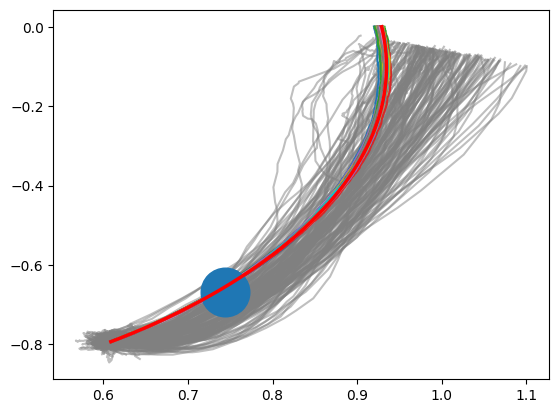

In [150]:
gamma, epsilon, alpha = res3.x
sigma = res4.x

T_samples=idxrule
vel_samples=dfv.T.max()
xT2_samples=[]
n = 50 
fig, ax = plt.subplots( nrows=1, ncols=1 )  # create figure & 1 axis

for i in range(len(dfx_3)):
    plt.plot(dfx_3.iloc[i], dfy_3.iloc[i], color='gray', alpha=0.5)

for i in range(n):
    x, y, v, w, ux, uy, T2= numericalSimulation(x_0 = (0,0,0,0),  p_T = 1.0, 
                        sigma = sigma, gamma = gamma, epsilon = epsilon, alpha = alpha,
                        u_0 = parameters2[:2], l_0 = parameters2[2:], 
                        i_max = 1000, dt = timestep,
                        Autoregr = False, 
                        Arc = True, angle=math.pi*7/24, angle0=0, p=(.2,0), r=.1)
    xT2_samples.append(x.flatten()[-1])
    plt.plot(x, y) 
    
plt.plot(np.cos(angle*(T_1-1)),np.sin(angle*(T_1-1)),marker='o',markersize=35)

x2, y2, v, w, ux, uy, T2= numericalSimulation(x_0 = (0,0,0,0),  p_T = 1.0, 
                        sigma = 0, gamma = gamma, epsilon = epsilon, alpha = alpha,
                        u_0 = parameters2[:2], l_0 = parameters2[2:], 
                        i_max = 1000, dt = timestep,
                        Autoregr = False, 
                        Arc = True, angle=math.pi*7/24, angle0=0, p=(.2,0), r=.1)
plt.plot(x2,y2,'r',linewidth=2.5)


In [151]:
parameters_estim=np.append(res3.x,res4.x)
parameters_estim

array([ 3.09575756,  3.0187353 , -2.81384974,  1.52741094])

The paramaters given do not follow the expected physical background, since we get a value of the $\alpha$ paramater negative. Recall that this paramater represents the proportion of mass of each direction of the arm. 

- Dispersió espacial i temporal dels moviments! 
- Considerar el terme de constraint del via point (escriure bé): 
$L = \| u \|^2 + q E \delta(t- T) + r E \delta(t- T_v)$
Afegint el nou paràmetre en les equacions d'error, on volem que siguin molt més grans en comparació a l'esforç, és a dir $q >r$ i $r > 1$. Així fitem la dispersió i podem obtenir unes equacions simulades molt més semblants a les experimentals. 
- Tot seguit fer el càlcul de les dispersions teòriques i experimentals, espacials $\mu$ i temporals $\phi$, i calcular així l'error: 
$E = \sum \| \mu_i - \hat{\mu}_i\| + \sum \| \phi_i - \hat{\phi}_i\|$ per cada tipus de moviment $i$ dels 4 clusters. 